In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [2]:
#Loading the data
df = pd.read_csv('matches.csv')
df1 = pd.read_csv('deliveries.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [4]:
#Filling missing values appropriately
df['player_of_match'].fillna('Match abandoned',inplace=True)
df['winner'].fillna('Match abandoned',inplace=True)
df['result_margin'][df['result']=='tie'].fillna('Match tied',inplace=True)
df['result_margin'].fillna('No result',inplace=True)
df['result'].fillna('Match abandoned',inplace=True)
df['target_runs'].fillna('Match abandoned',inplace=True)
df['target_overs'].fillna('Match abandoned',inplace=True)
#df['eliminator'].fillna('Match abandoned',inplace=True)
df['method'].fillna('N',inplace=True)
df.loc[df['season']=='2007/08','season']='2008'
df.loc[df['season']=='2009/10','season']='2010'
df.loc[df['season']=='2020/21','season']='2020'
df.loc[df['method']=='D/L','method']='Y'
df.loc[df['venue']=='Sharjah Cricket Stadium','city']='Sharjah'
df.loc[df['venue']=='Dubai International Cricket Stadium','city']='Dubai'
df.loc[df['venue']=='M.Chinnaswamy Stadium','venue']='M Chinnaswamy Stadium'
df.loc[df['team1']=='Rising Pune Supergiant','team1']='Rising Pune Supergiants'
df.loc[df['team2']=='Rising Pune Supergiant','team2']='Rising Pune Supergiants'
df.loc[df['team1']=='Royal Challengers Bangalore','team1']='Royal Challengers Bengaluru'
df.loc[df['team2']=='Royal Challengers Bangalore','team2']='Royal Challengers Bengaluru'
df.loc[df['toss_winner']=='Rising Pune Supergiant','toss_winner']='Rising Pune Supergiants'
df.loc[df['winner']=='Rising Pune Supergiant','winner']='Rising Pune Supergiants'
#df.rename(columns = {'id':'MatchNo'}, inplace = True)
df['Match_No']=list(range(1,len(list(df['id'].unique()))+1))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1095 non-null   int64 
 1   season           1095 non-null   object
 2   city             1095 non-null   object
 3   date             1095 non-null   object
 4   match_type       1095 non-null   object
 5   player_of_match  1095 non-null   object
 6   venue            1095 non-null   object
 7   team1            1095 non-null   object
 8   team2            1095 non-null   object
 9   toss_winner      1095 non-null   object
 10  toss_decision    1095 non-null   object
 11  winner           1095 non-null   object
 12  result           1095 non-null   object
 13  result_margin    1095 non-null   object
 14  target_runs      1095 non-null   object
 15  target_overs     1095 non-null   object
 16  super_over       1095 non-null   object
 17  method           1095 non-null   

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [7]:
mydict = {}
for i in range(len(df)):
    mydict[df.loc[i,'id']] = df.loc[i,'season']

In [8]:
df1['Year'] = df1['match_id'].map(mydict)

In [9]:
#Filling the missing values appropriately in fielder, player_dismissed, dismissal_kind and extras_type column
df1.loc[pd.isna(df1['player_dismissed'])==True,'fielder']='Not dismissed'
df1.loc[pd.isna(df1['player_dismissed'])==True,'player_dismissed']='Not dismissed'
df1.loc[pd.isna(df1['dismissal_kind'])==True,'dismissal_kind']='Not dismissed'	
df1.loc[pd.isna(df1['fielder'])==True,'fielder']='OMD'
df1.loc[(pd.isna(df1['extras_type'])==True),'extras_type']='No extras'
for i in range(len(df1)):
    if df1.iloc[i]['dismissal_kind']=='caught and bowled':
        df1['fielder'].replace({df1.iloc[i]['fielder'],df1.iloc[i]['bowler']}, inplace=True)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       260920 non-null  object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  260920 non-null  object
 15  dismissal_kind    260920 non-null  object
 16  fielder           260920 non-null  obj

In [11]:
#Renaming the id column with match no and then replacing the entries with match nummber.
df1['Match_No'] = np.nan
match_no=1
for i in list(df1['match_id'].unique()):
    df1['Match_No'].fillna(match_no, inplace=True)
    match_no+=1

In [12]:
#Correcting the error in team(franchise) naming
df1.loc[df1['batting_team']=='Rising Pune Supergiants','batting_team']='Rising Pune Supergiant'
df1.loc[df1['bowling_team']=='Rising Pune Supergiants','bowling_team']='Rising Pune Supergiant'
df1.loc[df1['batting_team']=='Royal Challengers Bangalore','batting_team']='Royal Challengers Bengaluru'
df1.loc[df1['bowling_team']=='Royal Challengers Bangalore','bowling_team']='Royal Challengers Bengaluru'

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          260920 non-null  int64  
 1   inning            260920 non-null  int64  
 2   batting_team      260920 non-null  object 
 3   bowling_team      260920 non-null  object 
 4   over              260920 non-null  int64  
 5   ball              260920 non-null  int64  
 6   batter            260920 non-null  object 
 7   bowler            260920 non-null  object 
 8   non_striker       260920 non-null  object 
 9   batsman_runs      260920 non-null  int64  
 10  extra_runs        260920 non-null  int64  
 11  total_runs        260920 non-null  int64  
 12  extras_type       260920 non-null  object 
 13  is_wicket         260920 non-null  int64  
 14  player_dismissed  260920 non-null  object 
 15  dismissal_kind    260920 non-null  object 
 16  fielder           26

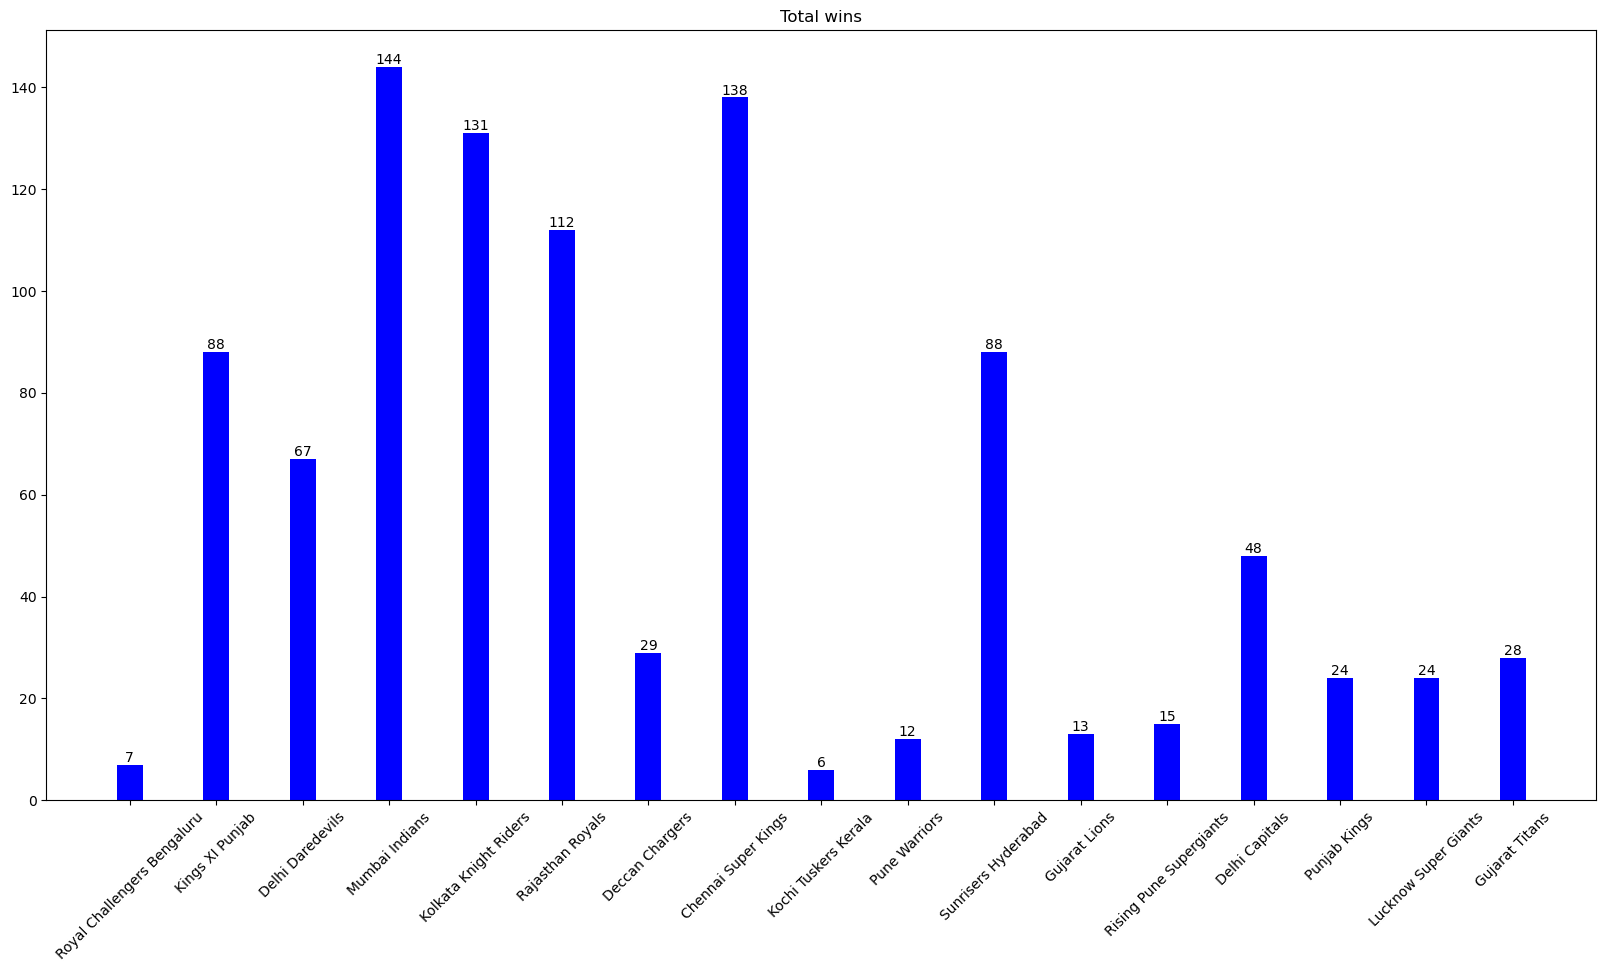

+----------------------+-----------------------------+------+--------+
|    Win/Loss Ratio    |            Team             | Wins | Losses |
+----------------------+-----------------------------+------+--------+
|  1.6470588235294117  |       Gujarat Titans        |  28  |   17   |
|         1.38         |     Chennai Super Kings     | 138  |  100   |
|  1.2307692307692308  |       Mumbai Indians        | 144  |  117   |
|         1.2          |    Lucknow Super Giants     |  24  |   20   |
|  1.1162790697674418  |       Delhi Capitals        |  48  |   43   |
|  1.0916666666666666  |    Kolkata Knight Riders    | 131  |  120   |
|  1.0275229357798166  |      Rajasthan Royals       | 112  |  109   |
|         1.0          |   Rising Pune Supergiants   |  15  |   15   |
|  0.9361702127659575  |     Sunrisers Hyderabad     |  88  |   94   |
|  0.8627450980392157  |       Kings XI Punjab       |  88  |  102   |
|  0.7647058823529411  |        Gujarat Lions        |  13  |   17   |
|     

In [14]:
#Win-loss ratio for each team
WON = []
LOST = []
TEAM = []
for i in df['team1'].unique():
    WON.append(df['winner'][(df['winner']==i)].count())
    LOST.append(df['team1'][(df['winner']!=i) & (df['team1']==i) ].count()+df['team2'][(df['winner']!=i) & (df['team2']==i) & (df['result']!='Match abandoned')].count())
    TEAM.append(i)
fig = plt.figure(figsize = (20, 10))
# creating the bar plot
BARS = plt.bar(TEAM, WON, color ='blue',width = 0.3)
for BAR in BARS:
    plt.text(BAR.get_x() + BAR.get_width() / 2.0, BAR.get_height(), f'{BAR.get_height():.0f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.title('Total wins')
plt.show()
TABLE = []
for i in range(0,len(WON)):
    TABLE.append((WON[i]/LOST[i],TEAM[i],WON[i],LOST[i]))
    
TABLE.sort(reverse=True)
TABLE.insert(0,('Win/Loss Ratio','Team','Wins','Losses'))
print(tabulate(TABLE,headers="firstrow",tablefmt="pretty"))

In [15]:
#Grouping the data as per each year
df2 = df1.groupby(df1.Year)

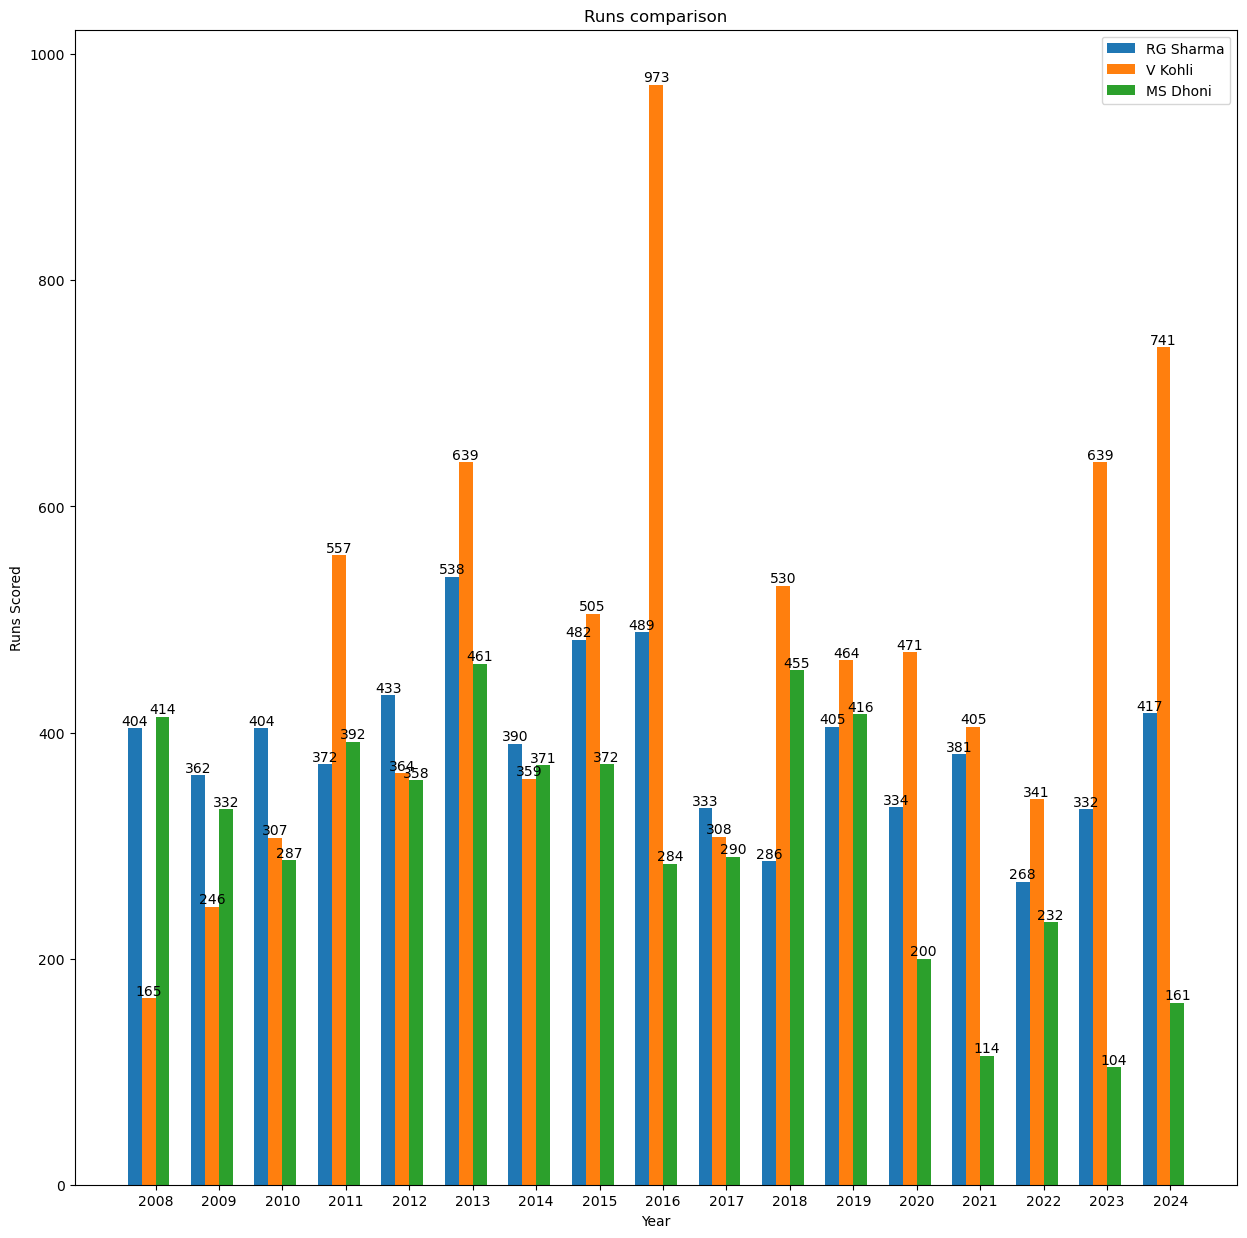

In [16]:
#Comparision of runs scored by Suresh Raina, Rohit Sharma, Virat Kohli and Mahendra Singh Dhoni each year
#RAINA = []
SHARMA = []
KOHLI = []
DHONI = []
YEAR = []
for i in list(df1['Year'].unique()):
    #df3 = df2.get_group(i)[df2.get_group(i)['batter']=='SK Raina']
    df4 = df2.get_group(i)[df2.get_group(i)['batter']=='RG Sharma']
    df5 = df2.get_group(i)[df2.get_group(i)['batter']=='V Kohli']
    df6 = df2.get_group(i)[df2.get_group(i)['batter']=='MS Dhoni']
    ##RAINA.append(int(df3['batsman_runs'].sum()))
    SHARMA.append(int(df4['batsman_runs'].sum()))
    KOHLI.append(int(df5['batsman_runs'].sum()))
    DHONI.append(int(df6['batsman_runs'].sum()))
    YEAR.append(int(i))
index = np.arange(17)
bar_width = 0.22
fig, ax = plt.subplots(figsize=(15,15))
#SR = ax.bar(index, RAINA, bar_width,label="SK Raina")
RGS = ax.bar(index, SHARMA,bar_width, label="RG Sharma")
VK = ax.bar(index+bar_width, KOHLI,bar_width, label="V Kohli")
MSD = ax.bar(index+2*bar_width, DHONI,bar_width, label="MS Dhoni")
for BAR in RGS+VK+MSD:
    plt.text(BAR.get_x() + BAR.get_width() / 2.0, BAR.get_height(), f'{BAR.get_height():.0f}', ha='center', va='bottom')
ax.set_xlabel('Year')
ax.set_ylabel('Runs Scored')
ax.set_title('Runs comparison')
ax.set_xticks(index+1.5*bar_width)
ax.set_xticklabels(YEAR)
ax.legend()
plt.show()

In [17]:
#Orange and purple cap holders for each year till 2020
def orange_and_purple_cap(data,year):
    O = []
    P = []
    data_y = data.groupby(data.Year)
    for j in data_y.get_group(year)['batter'].unique():
        Data_O = data_y.get_group(year)[data_y.get_group(year)['batter']==j]
        O.append((int(Data_O['batsman_runs'].sum()),j))
    for j in data_y.get_group(year)['bowler'].unique():
        Data_P = data_y.get_group(year)[data_y.get_group(year)['bowler']==j]
        P.append((int(Data_P[(Data_P['bowler']==j) & (Data_P['dismissal_kind']!='run out') & (Data_P['dismissal_kind']!='retired hurt') & (Data_P['dismissal_kind']!='obstructing the field')]\
        ['is_wicket'].sum()),j))
    O.sort()
    P.sort()
    return 'Orange cap: '+str(O[-1][-1]),'\nPurple cap: '+str(P[-1][-1])

data = df1
year = input('Year : ')
print(orange_and_purple_cap(data,year)[0],orange_and_purple_cap(data,year)[1])

Year :  2024


Orange cap: V Kohli 
Purple cap: HV Patel


In [18]:
#Most runs and wickets against a particular team
x = df1['batter'].unique()
Most_runs = []
    
for i in df1['bowling_team'].unique():
    O = []
    for j in x:
        O.append((int(df1[(df1['batter']==j) & (df1['bowling_team']==i)]['batsman_runs'].sum()),j,i))

    Most_runs.append(max(O))
    
y = df1['bowler'].unique()
Most_wickets = [] 

for l in df1['batting_team'].unique():    
    P = []
    for k in y:
        P.append((int(df1[(df1['bowler']==k) & (df1['batting_team']==l) & (df1['dismissal_kind']!='run out') & (df1['dismissal_kind']!='retired hurt')\
        & (df1['dismissal_kind']!='obstructing the field')]['is_wicket'].sum()),k,l))
    Most_wickets.append(max(P))

Most_runs.sort(reverse=True)
Most_wickets.sort(reverse=True)
Most_runs.insert(0,("Most runs","Batsman","Team"))
Most_wickets.insert(0,("Most wickets","Bowler","Team"))
print(tabulate(Most_runs, headers='firstrow',tablefmt="pretty"))

+-----------+--------------+-----------------------------+
| Most runs |   Batsman    |            Team             |
+-----------+--------------+-----------------------------+
|   1093    |  DA Warner   |    Kolkata Knight Riders    |
|   1057    |   S Dhawan   |     Chennai Super Kings     |
|    954    |   KL Rahul   |       Mumbai Indians        |
|    906    |  DA Warner   |       Kings XI Punjab       |
|    864    |   MS Dhoni   | Royal Challengers Bengaluru |
|    801    |  SV Samson   |     Sunrisers Hyderabad     |
|    764    |   V Kohli    |      Rajasthan Royals       |
|    761    |   V Kohli    |      Delhi Daredevils       |
|    436    | Ishan Kishan |       Delhi Capitals        |
|    383    |   CH Gayle   |        Pune Warriors        |
|    350    |  RD Gaikwad  |       Gujarat Titans        |
|    349    |   V Kohli    |        Punjab Kings         |
|    339    |   R Dravid   |       Deccan Chargers       |
|    336    |  DA Warner   |        Gujarat Lions       

In [19]:
print(tabulate(Most_wickets, headers='firstrow',tablefmt="pretty"))

+--------------+-------------+-----------------------------+
| Most wickets |   Bowler    |            Team             |
+--------------+-------------+-----------------------------+
|      33      |  MM Sharma  |       Mumbai Indians        |
|      32      |   B Kumar   |    Kolkata Knight Riders    |
|      31      | SL Malinga  |     Chennai Super Kings     |
|      31      |  A Mishra   |      Rajasthan Royals       |
|      29      |  UT Yadav   |       Kings XI Punjab       |
|      29      |  JJ Bumrah  | Royal Challengers Bengaluru |
|      28      |  YS Chahal  |     Sunrisers Hyderabad     |
|      21      | SL Malinga  |      Delhi Daredevils       |
|      19      | SL Malinga  |       Deccan Chargers       |
|      19      | Rashid Khan |       Delhi Capitals        |
|      12      | SL Malinga  |        Pune Warriors        |
|      12      |   B Kumar   |        Gujarat Lions        |
|      11      |  YS Chahal  |        Punjab Kings         |
|      9       |  K Raba

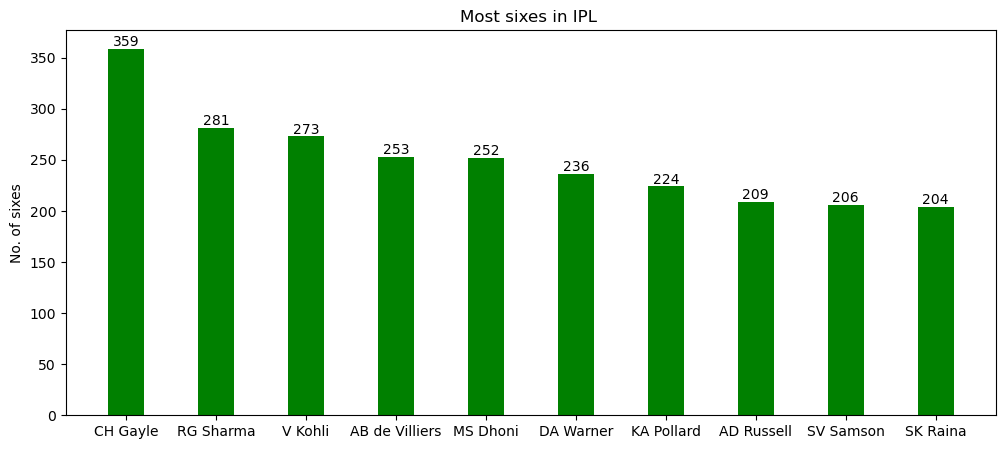

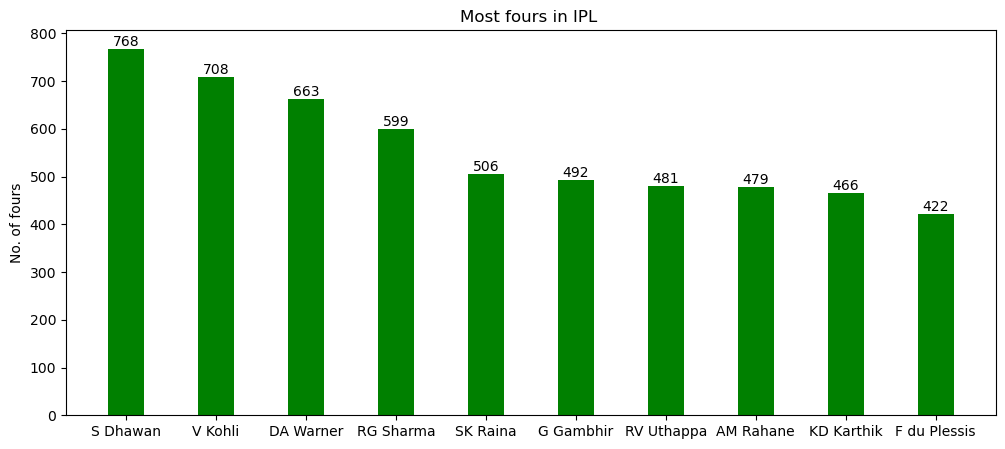

In [20]:
#Most sixes and fours in IPL (individual)
Most_sixes_with_batsman = []
for i in df1['batter'].unique():
    Most_sixes_with_batsman.append((int(df1[(df1['batter']==i) & (df1['batsman_runs']==6)]['batsman_runs'].sum()/6),i)) 
Most_sixes_with_batsman.sort(reverse=True)
fig = plt.figure(figsize = (12, 5))
Most_sixes = []
Batsman = []
for i in Most_sixes_with_batsman:
    Most_sixes.append(i[0])
    Batsman.append(i[1])
    
# creating the bar plot
BARS = plt.bar(Batsman[0:10], Most_sixes[0:10], color ='green',
        width = 0.4)
for BAR in BARS:
    plt.text(BAR.get_x() + BAR.get_width() / 2.0, BAR.get_height(), f'{BAR.get_height():.0f}', ha='center', va='bottom')

plt.ylabel("No. of sixes")
plt.title("Most sixes in IPL ")
plt.show()

#Most fours in IPL
Most_fours_with_batsman = []
for i in df1['batter'].unique():
    Most_fours_with_batsman.append((int(df1[(df1['batter']==i) & (df1['batsman_runs']==4)]['batsman_runs'].sum()/4),i)) 
Most_fours_with_batsman.sort(reverse=True)
# creating the bar plot
fig = plt.figure(figsize = (12, 5))
Most_fours = []
Batsman = []
for i in Most_fours_with_batsman:
    Most_fours.append(i[0])
    Batsman.append(i[1])
BARS = plt.bar(Batsman[0:10], Most_fours[0:10], color ='green',width = 0.4)
for BAR in BARS:
    plt.text(BAR.get_x() + BAR.get_width() / 2.0, BAR.get_height(), f'{BAR.get_height():.0f}', ha='center', va='bottom')
plt.ylabel("No. of fours")
plt.title("Most fours in IPL ")
plt.show()

In [21]:
#Best strike rate
Best_strike_rate = []
for j in x:
    Best_strike_rate.append((round((int(df1[(df1['batter']==j) &  (int(df1[(df1['batter']==j) ]['ball'].count()) >150)]['batsman_runs'].sum())/\
    int(df1[(df1['batter']==j) ]['ball'].count()))*100,2),j))
Best_strike_rate.sort(reverse=True)

Best_strike_rate.insert(0,('Strike rate *','Batsman'))
print(tabulate(Best_strike_rate[0:11], headers='firstrow',tablefmt="pretty"))
print('* Minimum 150 balls faced')

+---------------+----------------+
| Strike rate * |    Batsman     |
+---------------+----------------+
|    169.61     |    PD Salt     |
|    169.46     |    T Stubbs    |
|    168.56     |    TM Head     |
|    164.22     |   AD Russell   |
|    161.99     |   H Klaasen    |
|    158.03     |    TH David    |
|    155.89     |   SP Narine    |
|    155.51     | Shashank Singh |
|    155.35     |   K Gowtham    |
|    154.77     |    N Pooran    |
+---------------+----------------+
* Minimum 150 balls faced


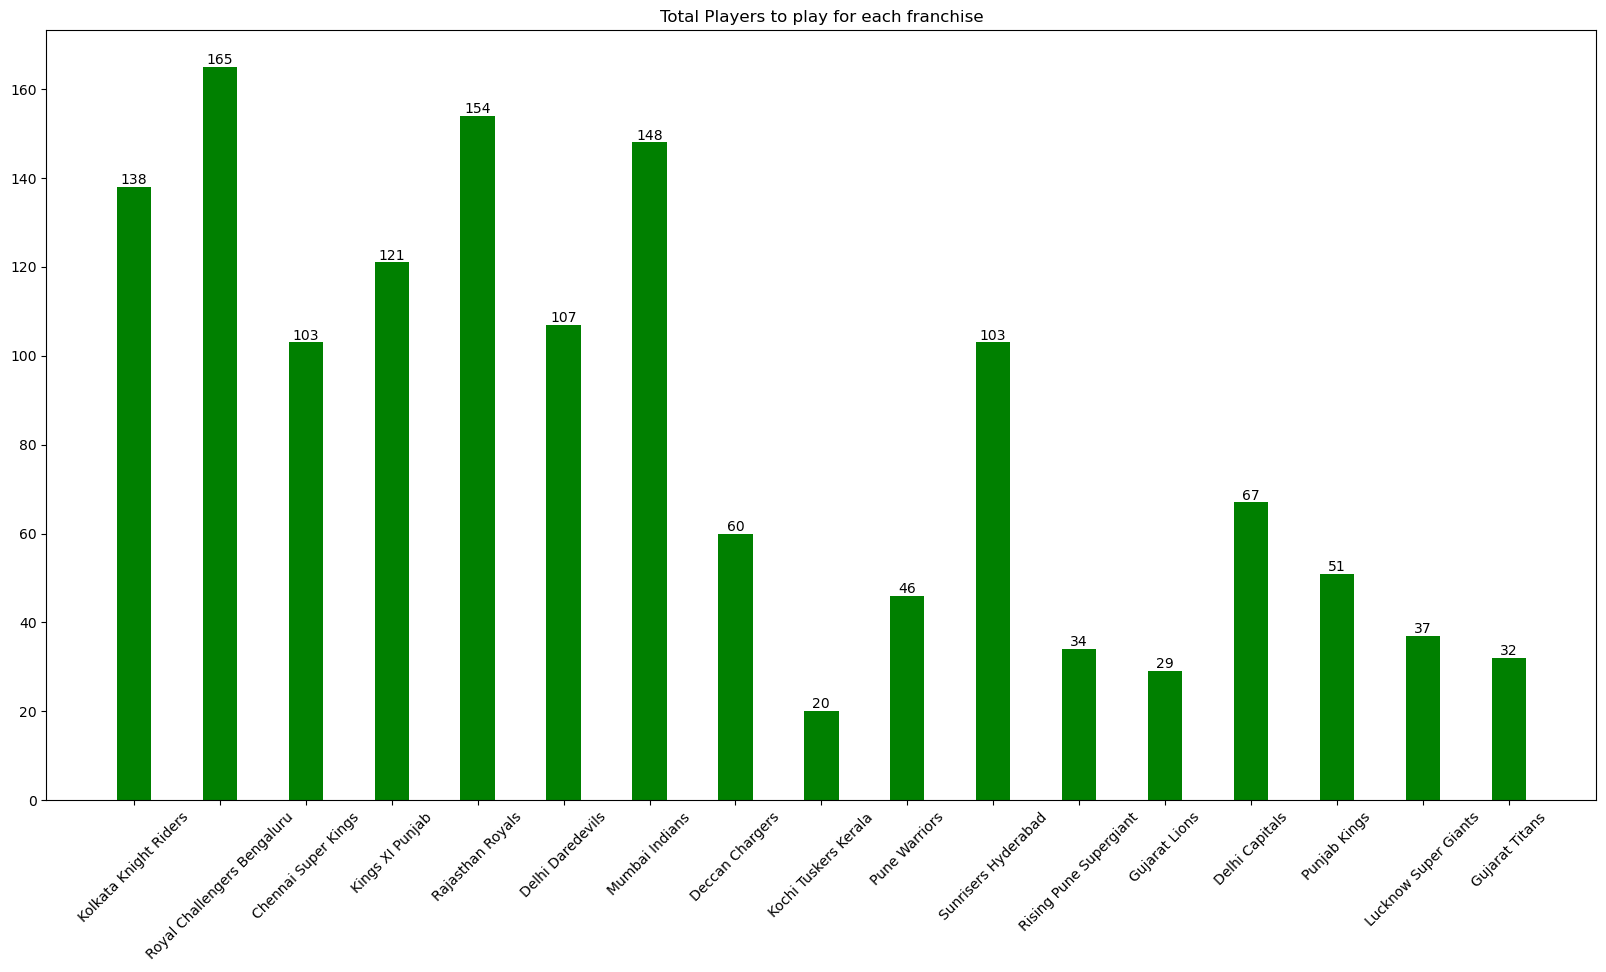

In [22]:
#Total players to play for each franchise
Players_with_team = []
for i in list(df1['batting_team'].unique()):
    Players_with_team.append((list(df1['batter'][(df1['batting_team']==i)].unique())+list(df1['bowler'][(df1['bowling_team']==i)].unique()),i))

Unique_players_with_team = []
for i in Players_with_team:
    Players = []
    for j in i[0]:
        if j not in Players:
            Players.append(j)
    Unique_players_with_team.append((len(Players),i[1]))
fig = plt.figure(figsize = (20, 10))
Total_players = []
Team = []
for i in Unique_players_with_team:
    Total_players.append(i[0])
    Team.append(i[1])
BARS = plt.bar(Team, Total_players, color ='green',width = 0.4)
for BAR in BARS:
    plt.text(BAR.get_x() + BAR.get_width() / 2.0, BAR.get_height(), f'{BAR.get_height():.0f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.title("Total Players to play for each franchise")
plt.show()

In [23]:
#Ratio of balls faced and boundaries scored(individual)
Balls_per_boundary = []
for i in list(df1['batter'].unique()):
    x = int(df1[(df1['batter']==i) & (df1['batsman_runs']==6)]['batsman_runs'].sum()/6)+int(df1[(df1['batter']==i) & (df1['batsman_runs']==4)]['batsman_runs'].sum()/4)
    if int(df1[(df1['batter']==i) & (df1['extras_type']!='wides') & (df1['extras_type']!='penalty')]['ball'].count()) > 150 and x!=0:
        Balls_per_boundary.append((round(int(df1[(df1['batter']==i) & (df1['extras_type']!='wides') & (df1['extras_type']!='penalty')]['ball'].count())/x,2),i))
Balls_per_boundary.sort()
Balls_per_boundary.insert(0,('Balls per boundary *','Batsman'))
print(tabulate(Balls_per_boundary[0:15], headers='firstrow',tablefmt="github"))
print('* Minimum 150 balls faced')

|   Balls per boundary * | Batsman        |
|------------------------|----------------|
|                   3.44 | PD Salt        |
|                   3.54 | SP Narine      |
|                   3.74 | AD Russell     |
|                   3.8  | MJ Lumb        |
|                   3.83 | TM Head        |
|                   3.99 | V Sehwag       |
|                   4.06 | YBK Jaiswal    |
|                   4.29 | PP Shaw        |
|                   4.33 | ST Jayasuriya  |
|                   4.34 | P Simran Singh |
|                   4.36 | CH Gayle       |
|                   4.38 | KR Mayers      |
|                   4.38 | LS Livingstone |
|                   4.38 | Rashid Khan    |
* Minimum 150 balls faced


In [24]:
#Ratio of balls delievered and wickets taken(individual)
Balls_per_wicket = []
for i in df1['bowler'].unique():
    x = int(df1[(df1['bowler']==i) & (df1['dismissal_kind']!='run out') & (df1['dismissal_kind']!='retired hurt') & (df1['dismissal_kind']!='obstructing the field')]['is_wicket'].sum())
    if int(df1[(df1['bowler']==i) & (df1['extras_type']!='wides') & (df1['extras_type']!='noballs') & (df1['extras_type']!='penalty')]['ball'].count()) > 300 and x!=0:
        Balls_per_wicket.append((round(int(df1[(df1['bowler']==i) & (df1['extras_type']!='wides') & (df1['extras_type']!='noballs') & (df1['extras_type']!='penalty')]['ball'].count())/x,2),i))
Balls_per_wicket.sort()
Balls_per_wicket.insert(0,('Balls per wicket *','Bowler'))
print(tabulate(Balls_per_wicket[0:15], headers='firstrow',tablefmt="github"))
print('* Minimum 300 balls bowled')

|   Balls per wicket * | Bowler        |
|----------------------|---------------|
|                12.96 | L Ngidi       |
|                13.26 | M Pathirana   |
|                14.45 | A Zampa       |
|                14.67 | CR Woakes     |
|                14.76 | AD Russell    |
|                15.14 | MR Marsh      |
|                15.24 | K Rabada      |
|                15.4  | Harshit Rana  |
|                15.52 | Naveen-ul-Haq |
|                15.56 | MF Maharoof   |
|                15.57 | DE Bollinger  |
|                15.77 | PWH de Silva  |
|                15.96 | Mukesh Kumar  |
|                16.01 | HV Patel      |
* Minimum 300 balls bowled


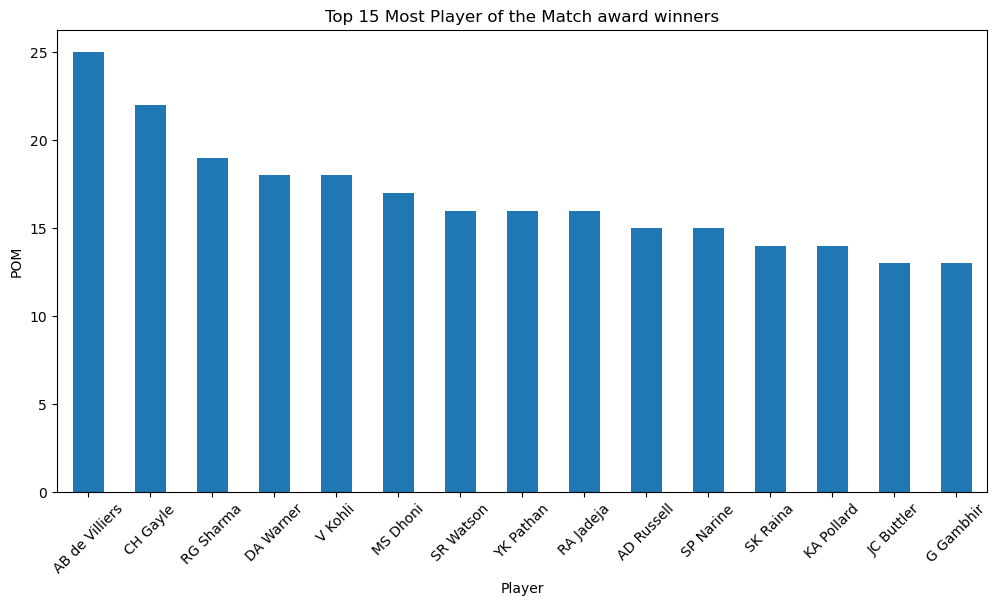

In [25]:
#Most player of the match awards
counts = df['player_of_match'].value_counts()[0:15]

# Create a bar chart
plt.figure(figsize=(12, 6))
counts.plot(kind='bar')
plt.title('Top 15 Most Player of the Match award winners')
plt.xlabel('Player')
plt.ylabel('POM')
plt.xticks(rotation=45)
plt.show()

In [26]:
# Top 10 biggest margin wins with respect to runs
df[['result_margin','team1','team2','winner','date']][df['result']=='runs'].sort_values('result_margin',ascending=False)[0:10]

,result_margin,team1,team2,winner,date
620,146.0,Delhi Daredevils,Mumbai Indians,Mumbai Indians,2017-05-06
560,144.0,Royal Challengers Bengaluru,Gujarat Lions,Royal Challengers Bangalore,2016-05-14
0,140.0,Royal Challengers Bengaluru,Kolkata Knight Riders,Kolkata Knight Riders,2008-04-18
496,138.0,Royal Challengers Bengaluru,Kings XI Punjab,Royal Challengers Bangalore,2015-05-06
352,130.0,Royal Challengers Bengaluru,Pune Warriors,Royal Challengers Bangalore,2013-04-23
706,118.0,Sunrisers Hyderabad,Royal Challengers Bengaluru,Sunrisers Hyderabad,2019-03-31
1009,112.0,Royal Challengers Bengaluru,Rajasthan Royals,Royal Challengers Bangalore,2023-05-14
236,111.0,Kings XI Punjab,Royal Challengers Bengaluru,Kings XI Punjab,2011-05-17
1039,106.0,Kolkata Knight Riders,Delhi Capitals,Kolkata Knight Riders,2024-04-03
55,105.0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,2008-05-30


In [27]:
#Top 10 narrowest margin wins with respect to runs
df[['result_margin','team1','team2','winner','date']][df['result']=='runs'].sort_values('result_margin',ascending=True)[0:10]

,result_margin,team1,team2,winner,date
635,1.0,Mumbai Indians,Rising Pune Supergiants,Mumbai Indians,2017-05-21
104,1.0,Deccan Chargers,Kings XI Punjab,Kings XI Punjab,2009-05-17
555,1.0,Kings XI Punjab,Royal Challengers Bengaluru,Royal Challengers Bangalore,2016-05-09
44,1.0,Mumbai Indians,Kings XI Punjab,Kings XI Punjab,2008-05-21
837,1.0,Royal Challengers Bengaluru,Delhi Capitals,Royal Challengers Bangalore,2021-04-27
290,1.0,Pune Warriors,Mumbai Indians,Mumbai Indians,2012-05-03
284,1.0,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,2012-04-29
459,1.0,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,2015-04-09
1017,1.0,Lucknow Super Giants,Kolkata Knight Riders,Lucknow Super Giants,2023-05-20
734,1.0,Royal Challengers Bengaluru,Chennai Super Kings,Royal Challengers Bangalore,2019-04-21


In [28]:
# Top 10 biggest margin wins with respect to wickets
df[['result_margin','team1','team2','winner','date']][df['result']=='wickets'].sort_values('result_margin',ascending=False)[0:10]

,result_margin,team1,team2,winner,date
239,10.0,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,2011-05-20
482,10.0,Delhi Daredevils,Royal Challengers Bengaluru,Royal Challengers Bangalore,2015-04-26
796,10.0,Chennai Super Kings,Mumbai Indians,Mumbai Indians,2020-10-23
683,10.0,Kings XI Punjab,Royal Challengers Bengaluru,Royal Challengers Bangalore,2018-05-14
811,10.0,Mumbai Indians,Sunrisers Hyderabad,Sunrisers Hyderabad,2020-11-03
60,10.0,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,2009-04-19
831,10.0,Rajasthan Royals,Royal Challengers Bengaluru,Royal Challengers Bangalore,2021-04-22
611,10.0,Kings XI Punjab,Delhi Daredevils,Kings XI Punjab,2017-04-30
124,10.0,Royal Challengers Bengaluru,Rajasthan Royals,Royal Challengers Bangalore,2010-03-18
579,10.0,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,2017-04-07


In [29]:
# Top 10 narrowest wins with respect to wickets
df[['result_margin','team1','team2','winner','date']][df['result']=='wickets'].sort_values('result_margin',ascending=True)[0:10]

,result_margin,team1,team2,winner,date
636,1.0,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,2018-04-07
642,1.0,Mumbai Indians,Sunrisers Hyderabad,Sunrisers Hyderabad,2018-04-12
964,1.0,Royal Challengers Bengaluru,Lucknow Super Giants,Lucknow Super Giants,2023-04-10
500,1.0,Kolkata Knight Riders,Kings XI Punjab,Kolkata Knight Riders,2015-05-09
970,2.0,Lucknow Super Giants,Punjab Kings,Punjab Kings,2023-04-15
816,2.0,Mumbai Indians,Royal Challengers Bengaluru,Royal Challengers Bangalore,2021-04-09
536,2.0,Rising Pune Supergiants,Kolkata Knight Riders,Kolkata Knight Riders,2016-04-24
853,2.0,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,2021-09-26
753,2.0,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,2019-05-08
1054,2.0,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,2024-04-16


In [30]:
#Runrate in powerplay and death overs(17-20) for all participating teams each year
df1_y = df1.groupby(df1.Year)
Run_rate_powerplay_every_year = []
for i in df1['Year'].unique():
    Run_rate = []
    df2 = pd.DataFrame()
    for j in df1['batting_team'].unique():
        df2 = df1_y.get_group(i)[df1_y.get_group(i)['batting_team']==j]  
        x = int(df2[(df2['extras_type']!='wides') & (df2['extras_type']!='noballs') & (df2['extras_type']!='penalty') & (df2['over']<7)]['ball'].count())
        y = int(df2[(df2['extras_type']!='wides') & (df2['extras_type']!='noballs') & (df2['extras_type']!='penalty') & (df2['over']>16)]['ball'].count())
        if x!=0 and y!=0:
            Run_rate.append((round(6*(int(df2[(df2['over']<7)]['batsman_runs'].sum())+int(df2[(df2['over']<7)]['extra_runs'].sum()))/x,2),\
                             round(6*(int(df2[(df2['over']>16)]['batsman_runs'].sum())+int(df2[(df2['over']>16)]['extra_runs'].sum()))/y,2),j,int(i)))
    Run_rate_powerplay_every_year.append(Run_rate)
for i in Run_rate_powerplay_every_year:
    i.insert(0,('Run rate (Powerplay)','Run rate (death overs (17-20))','Team','Year'))
    print(tabulate(i,headers='firstrow',tablefmt='pretty'))

+----------------------+--------------------------------+-----------------------------+------+
| Run rate (Powerplay) | Run rate (death overs (17-20)) |            Team             | Year |
+----------------------+--------------------------------+-----------------------------+------+
|         6.64         |             11.68              |    Kolkata Knight Riders    | 2008 |
|         6.27         |              9.38              | Royal Challengers Bengaluru | 2008 |
|         7.57         |             11.41              |     Chennai Super Kings     | 2008 |
|         8.43         |             10.78              |       Kings XI Punjab       | 2008 |
|         7.88         |              9.4               |      Rajasthan Royals       | 2008 |
|         8.58         |             10.11              |      Delhi Daredevils       | 2008 |
|         8.01         |              10.4              |       Mumbai Indians        | 2008 |
|         7.53         |             10.57        

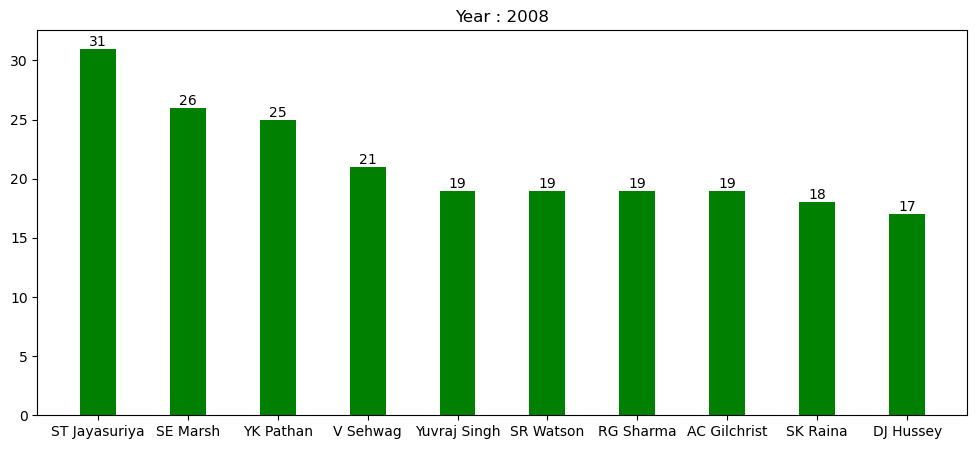

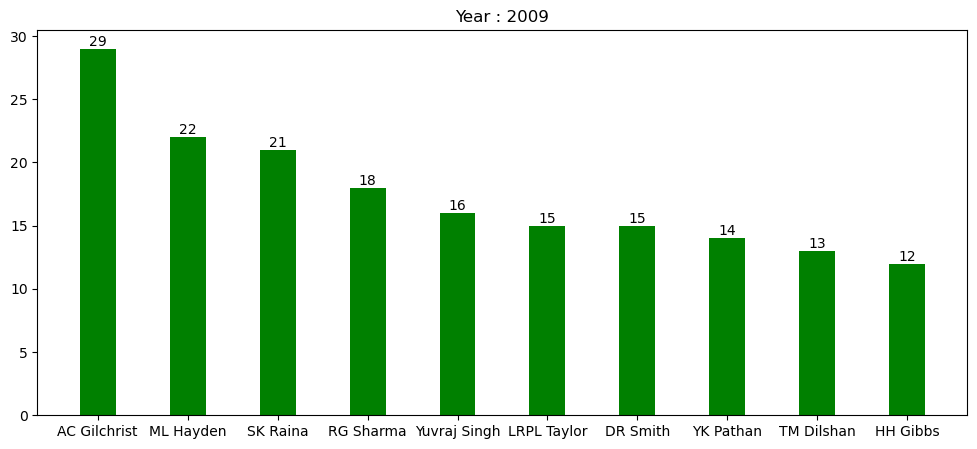

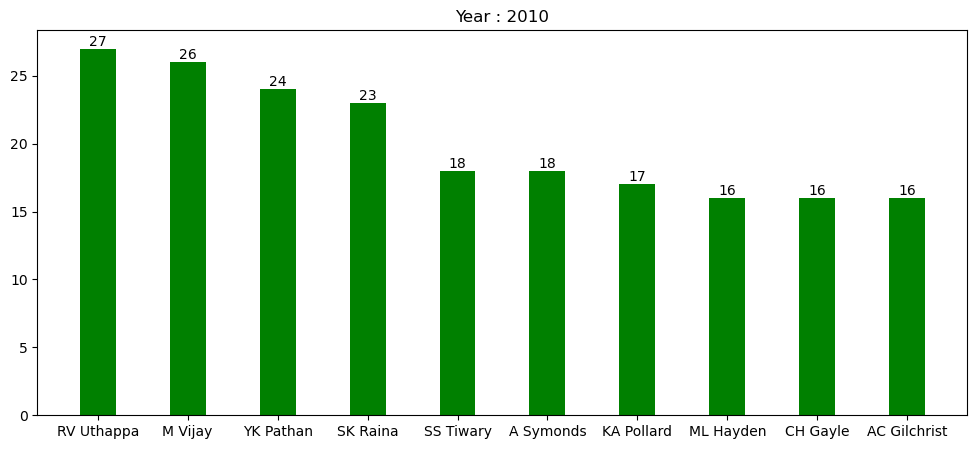

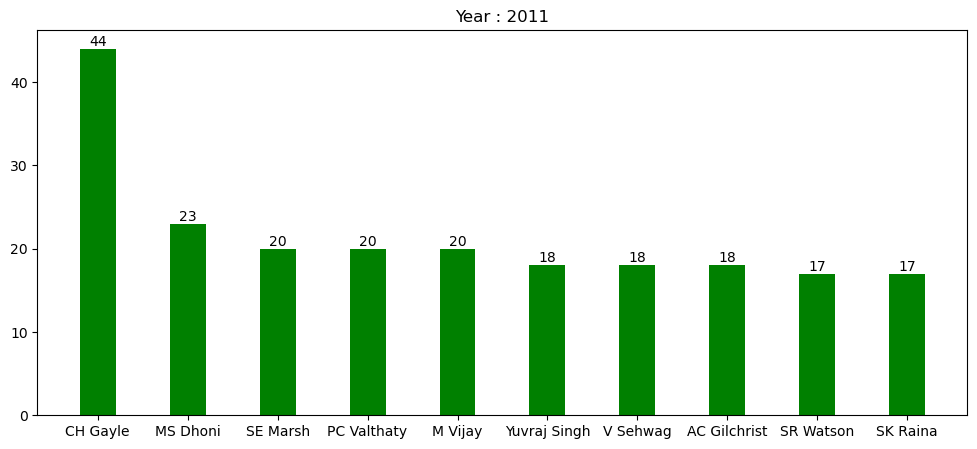

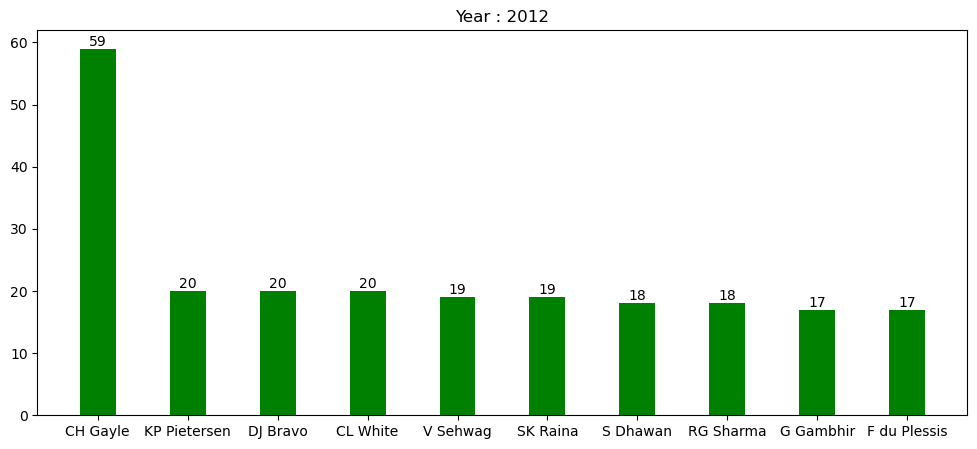

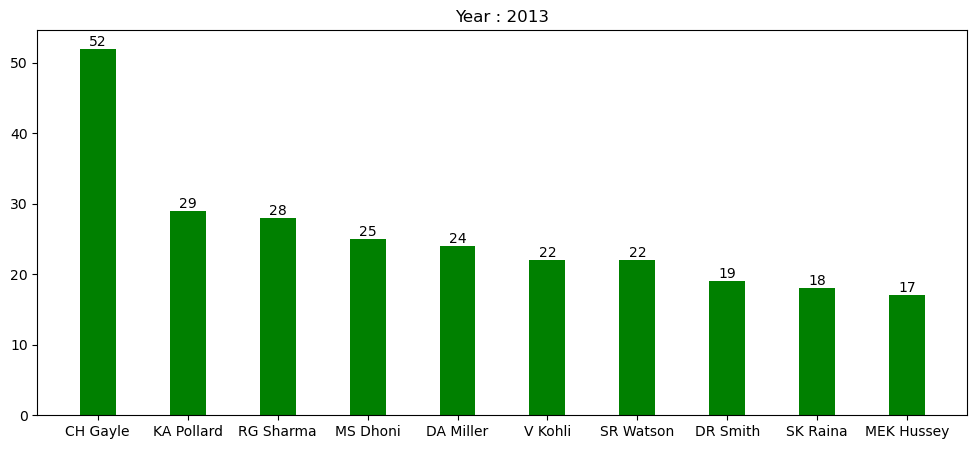

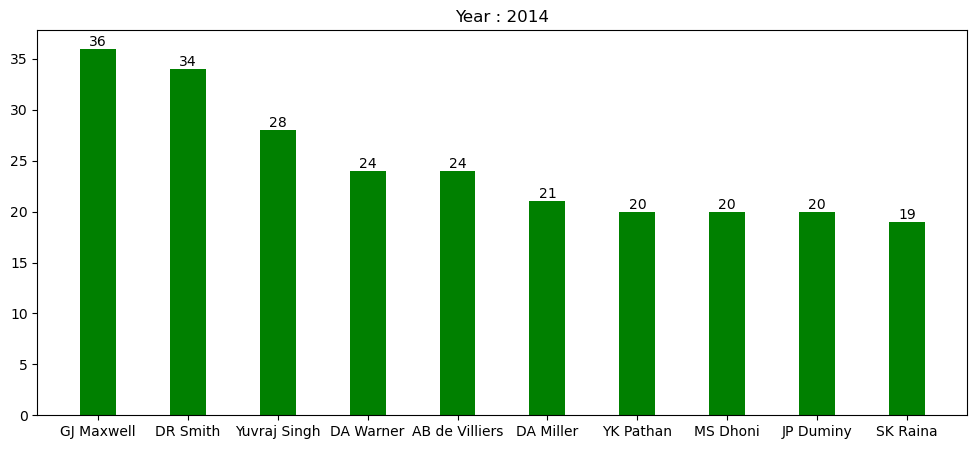

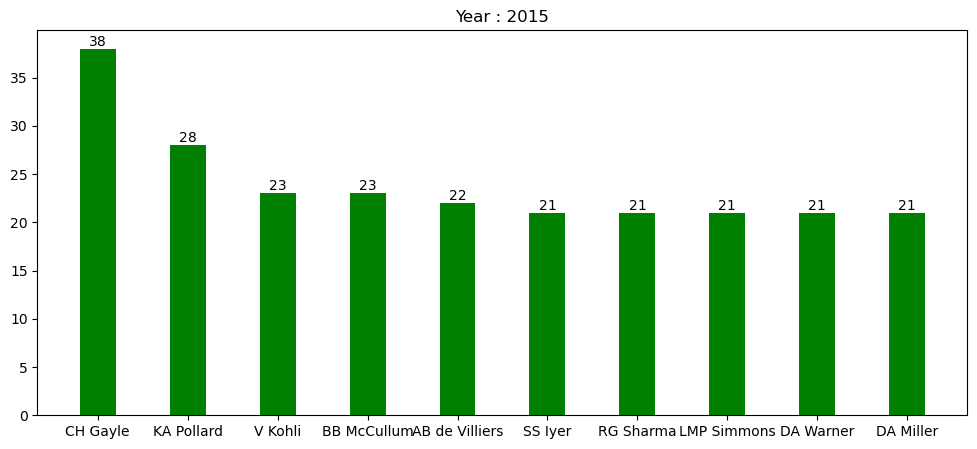

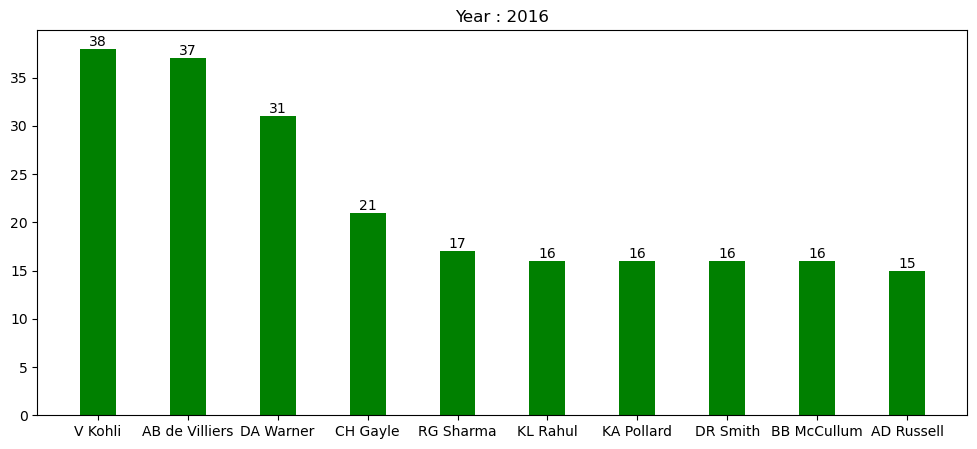

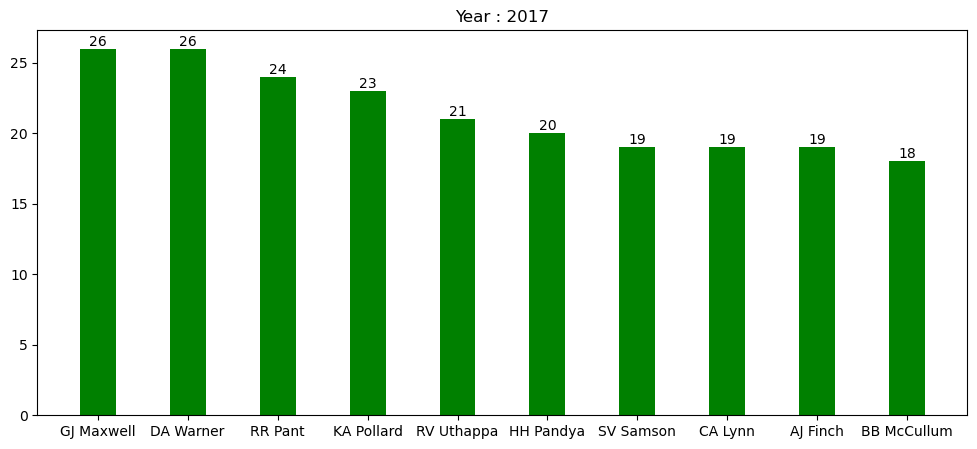

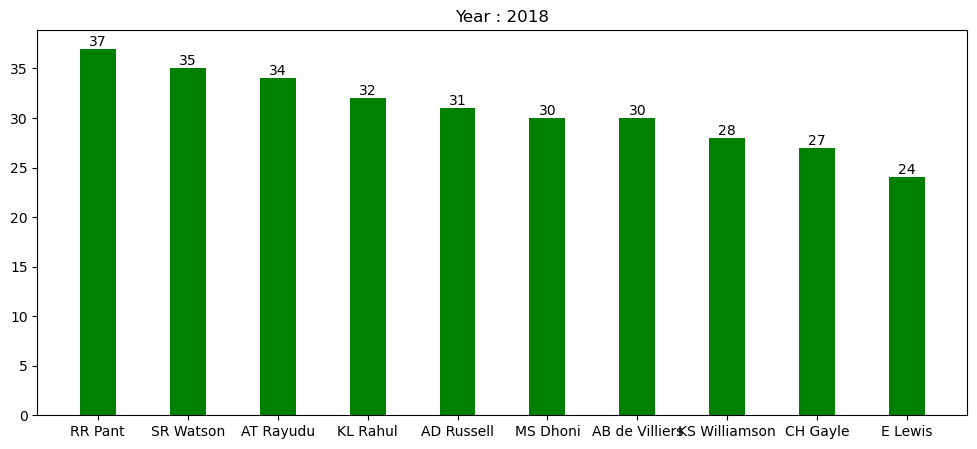

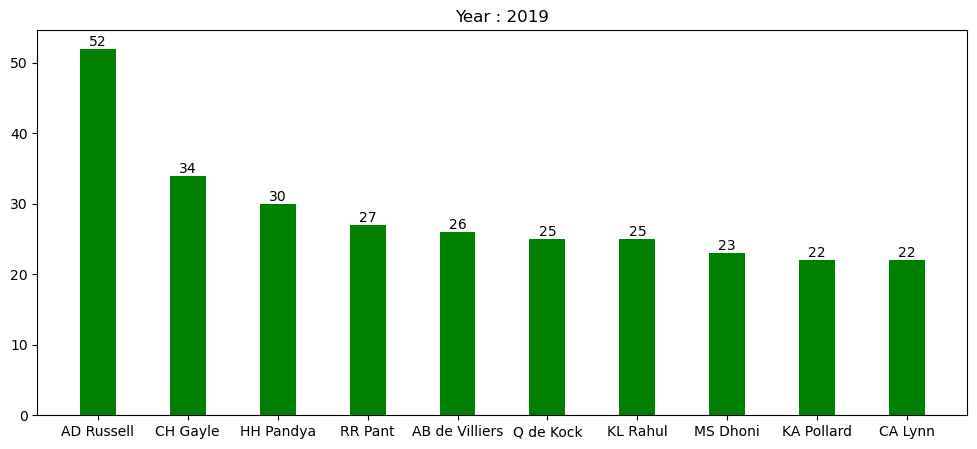

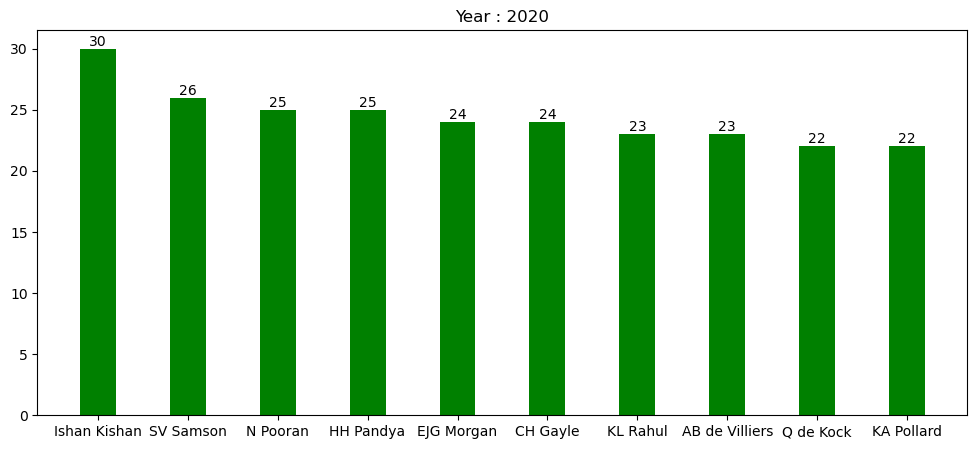

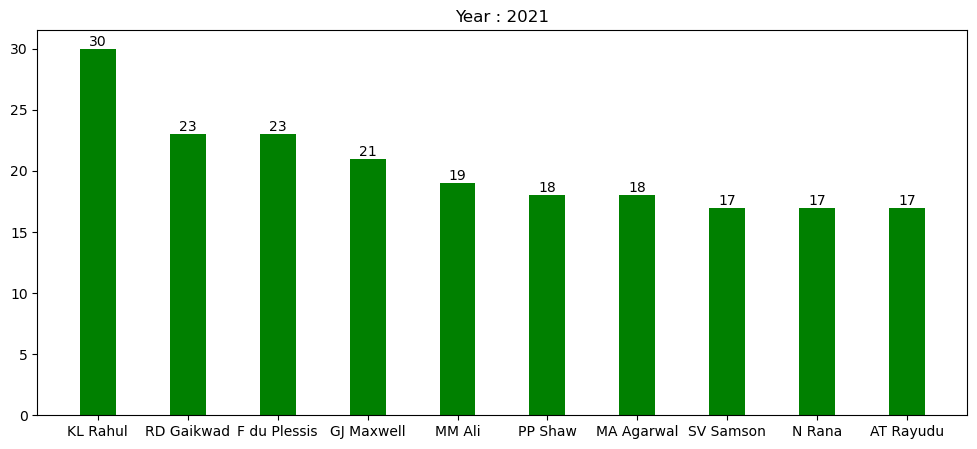

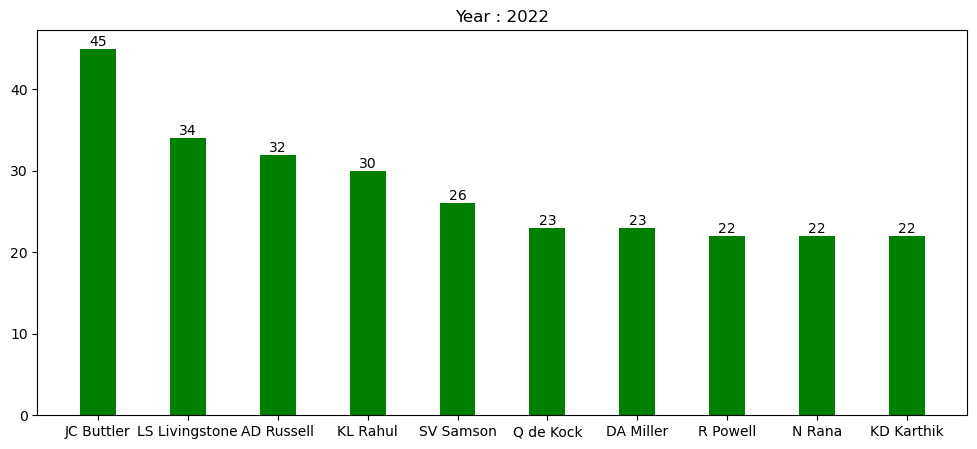

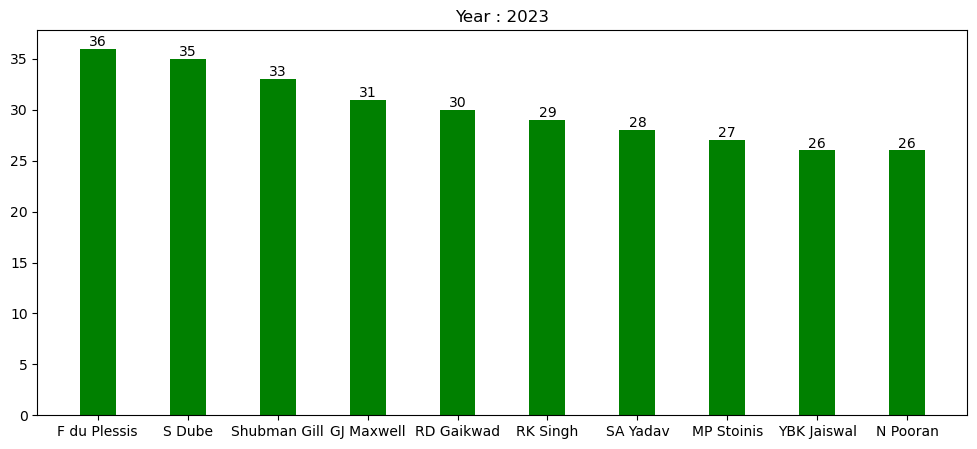

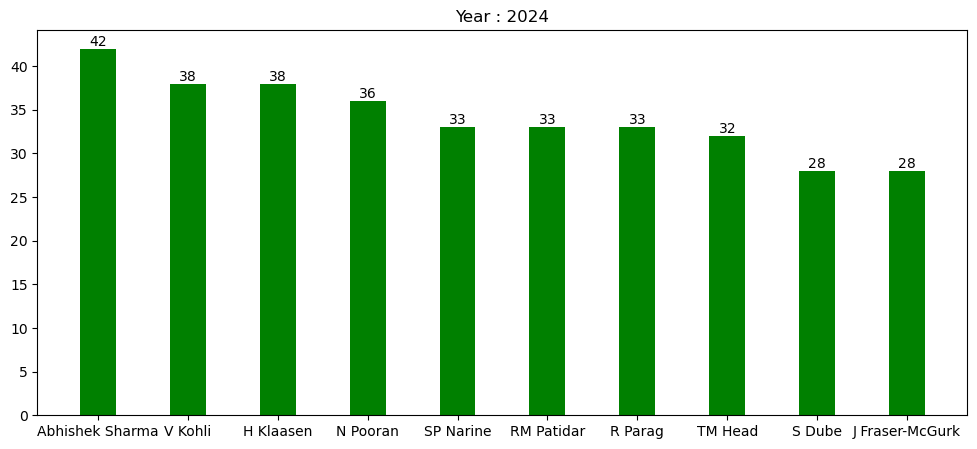

In [31]:
#Most sixes and fours in IPL (individual) on a yearly basis
for j in df1['Year'].unique():
    df2 = df1_y.get_group(j)
    Most_sixes_with_batsman_year = []
    for i in list(df1['batter'].unique()):
        Most_sixes_with_batsman_year.append((int(df2[(df2['batter']==i) & (df2['batsman_runs']==6)]['batsman_runs'].sum()/6),i)) 
    Most_sixes_with_batsman_year.sort(reverse=True)
    fig = plt.figure(figsize = (12, 5))
    Most_sixes = []
    Batsman = []
    for i in Most_sixes_with_batsman_year:
        Most_sixes.append(i[0])
        Batsman.append(i[1])
    
    # creating the bar plot
    BARS = plt.bar(Batsman[0:10], Most_sixes[0:10], color ='green',width = 0.4)
    for BAR in BARS:
        plt.text(BAR.get_x() + BAR.get_width() / 2.0, BAR.get_height(), f'{BAR.get_height():.0f}', ha='center', va='bottom')
    plt.title("Year : "+str(int(j)))
    plt.show()